In [1]:
#!/usr/bin/env python
%matplotlib inline

from PyOPC.OPCContainers import *
from PyOPC.XDAClient import XDAClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_options((ilist,options)):
    print ilist; print options; print
 

In [3]:
address=''
%run 'address'  #lese geheime address='http://ip-number:port'


In [174]:
#Vorher braucht es eine VPN-Verindung zur Windenergieanlage
xda = XDAClient(OPCServerAddress=address,
                ReturnErrorText=True)

print_options(xda.GetStatus())
print_options(xda.Browse())

[]
{'RcvTime': datetime.datetime(2016, 2, 7, 10, 36, 35), 'SupportedInterfaceVersions': ['XML_DA_Version_1_0'], 'ClientRequestHandle': 'ZSI_750c4svJWm_GetStatus', 'VendorInfo': 'Enercon SCADA OPC XML DA', 'ReplyTime': datetime.datetime(2016, 2, 7, 10, 36, 35), 'StatusInfo': 'The server is running normally.', 'ProductVersion': 'V1.00', 'StartTime': datetime.datetime(2015, 12, 18, 10, 5, 35), 'SupportedLocaleIDs': ['en-us'], 'RevisedLocaleID': 'en-us', 'ServerState': 'running'}

[ItemContainer(Name=Loc, HasChildren=True, ItemPath=, IsEmpty=False, _Properties={}, IsItem=False, ItemName=Loc), ItemContainer(Name=Doc, HasChildren=True, ItemPath=, IsEmpty=False, _Properties={}, IsItem=False, ItemName=Doc), ItemContainer(Name=Scada, HasChildren=True, ItemPath=, IsEmpty=False, _Properties={}, IsItem=False, ItemName=Scada)]
{'RcvTime': datetime.datetime(2016, 2, 7, 10, 36, 37), 'ClientRequestHandle': 'ZSI_750c4svJWm_Browse', 'MoreElements': False, 'ReplyTime': datetime.datetime(2016, 2, 7, 10, 3

In [177]:
print_options(xda.Read([ItemContainer(ItemName='Loc/LocName')]))

[ItemContainer(QualityField=good, VendorField=0, Value=Wuelknitz-Streumen, ItemPath=, IsEmpty=False, _Properties={}, ClientItemHandle=ZSI_750c4svJWm_ReadItem_0, ItemName=Loc/LocName, LimitField=none)]
{'RcvTime': datetime.datetime(2016, 2, 7, 10, 37, 51), 'ClientRequestHandle': 'ZSI_750c4svJWm_Read', 'ReplyTime': datetime.datetime(2016, 2, 7, 10, 37, 51), 'RevisedLocaleID': 'en-us', 'ServerState': 'running'}



In [10]:
xda.GetStatus()

([],
 {'ClientRequestHandle': 'ZSI_TBlfSO4kcl_GetStatus',
  'ProductVersion': 'V1.00',
  'RcvTime': datetime.datetime(2016, 2, 6, 22, 17, 18),
  'ReplyTime': datetime.datetime(2016, 2, 6, 22, 17, 18),
  'RevisedLocaleID': 'en-us',
  'ServerState': 'running',
  'StartTime': datetime.datetime(2015, 12, 18, 10, 5, 35),
  'StatusInfo': 'The server is running normally.',
  'SupportedInterfaceVersions': ['XML_DA_Version_1_0'],
  'SupportedLocaleIDs': ['en-us'],
  'VendorInfo': 'Enercon SCADA OPC XML DA'})

In [11]:
item = ItemContainer(ItemName='Loc/LocName', MaxAge=500)
xda.Read(item)[0]

[ItemContainer(QualityField=good, VendorField=0, Value=Wuelknitz-Streumen, ItemPath=, IsEmpty=False, _Properties={}, ClientItemHandle=ZSI_TBlfSO4kcl_ReadItem_0, ItemName=Loc/LocName, LimitField=none)]

In [12]:
item = ItemContainer(ItemName='Loc/Wec/Plant2/P', MaxAge=500)
P=xda.Read(item)[0][0].Value

In [14]:
P #Leistung in KiloWatt

2717

In [15]:
item_Vwind = ItemContainer(ItemName='Loc/Wec/Plant2/Vwind', MaxAge=500)
item_P = ItemContainer(ItemName='Loc/Wec/Plant2/P', MaxAge=500)
all=xda.Read([item_Vwind,item_P])[0]

In [16]:
print (str(all[0].Value) + ' m/s Windgeschwindigkeit ')
print (str(all[1].Value) + ' kW Leistung')

10.400001 m/s Windgeschwindigkeit 
2808 kW Leistung


In [17]:
for i in xda.Browse(ItemName='Loc')[0][:]:
    print i.Name,i.HasChildren

LocNo False
LocName False
NoPlant False
Wec True
Ctrl True


In [231]:
path='Loc/Wec/Plant2'
itemcollect=[]
data={}
for i in xda.Browse(ItemName=path)[0][:]:
    #print i.Name
    if not i.HasChildren:
        i = ItemContainer(ItemName=path+"/"+i.Name)
        itemcollect.append(i)
#print itemcollect

%time all=xda.Read(itemcollect)
data['Timestamp']=all[1]['RcvTime']

for i in all[0]:
    i.Name=str.replace(i.ItemName,path+"/","")
    #print i.Name,"  ",i.Value
    data[i.Name]=i.Value

data

CPU times: user 16.6 ms, sys: 408 µs, total: 17 ms
Wall time: 3.52 s


{'Activ': True,
 'Alias': '',
 'CosPhi': 0.98871553,
 'Freq': 50.02,
 'GoPos': 134,
 'Hour': 1946,
 'I-L1': 2281,
 'I-L2': 2288,
 'I-L3': 2310,
 'NRotor': 12.74,
 'NomP': 3075,
 'P': 1650,
 'PavaExtern': 1471,
 'PavaForceM': 1471,
 'PavaTech': 1471,
 'PavaVWind': 1471,
 'Q': -250,
 'SerieNo': 1011128,
 'Timestamp': datetime.datetime(2016, 2, 7, 12, 25, 29),
 'TypeNo': 241,
 'TypeStr': 'CS101a',
 'U-L1': 241,
 'U-L2': 241,
 'U-L3': 241,
 'Vane': -4.0999999,
 'Vwind': 8.9000006,
 'Wexp': 2385304}

## Logs

In [199]:
path='Loc/Wec/Plant2/Log/Wecstd/Raw'
itemcollect=[]
for i in xda.Browse(ItemName=path)[0][:]:
    #print i.Name
    if not i.HasChildren:
        i = ItemContainer(ItemName=path+"/"+i.Name)
        itemcollect.append(i)
#print itemcollect

all=xda.Read(itemcollect)

In [200]:
#path2='Loc/Wec/Plant2/Log/Wecstd'
#xda.Browse(ItemName=path2)

In [201]:
log=[]
x=0
for i in all[0]:
    i.Name=str.replace(i.ItemName,path+"/","")
    #print i.Name,"  ",i.Value
    if i.Name.startswith("Val-"):
        log.append(i.Value)
    x=x+1
#print log

In [202]:
descr=[
u'Anzahl der Abtastwerte',
u'Mittlere Windgeschw. [m/s]',
u'Maximale Windgeschw. [m/s]',
u'Minimale Windgeschw. [m/s]',
u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]',
u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',
u'Minimale Leistung [kW]',
u'Gondelposition [º]',
u'Betriebsstunden [h]',
u'Produzierte Energie [kWh]',
u'Produktionsminuten [min]',
u'Mittlere Blindleistung [kVar]',
u'Maximale Blindleistung [kVar]',
u'Minimale Blindleistung [kVar]',
u'Mittelwert der theoretisch verfügbaren Wirkleistung im Wind [kW]',
u'Mittelwert der technisch verfügbaren Wirkleistung [kW]',
u'Mittelwert der maximal verfügbaren Wirkleistung begrenzt durch höhere Gewalt [kW]',
u'Mittelwert der verfügbaren Wirkleistung begrenzt durch externe Vorgaben [kW]',
u'Mittelwert Blattwinkel über A, B, C [°]','?1','?2','?3','?4','?5','?6','?7','?8'
]

In [203]:
log_df=pd.DataFrame(data=log[::-1],columns=descr)

In [204]:
log_df.head()

,Anzahl der Abtastwerte,Mittlere Windgeschw. [m/s],Maximale Windgeschw. [m/s],Minimale Windgeschw. [m/s],Mittlere Rotordrehzahl [U/s],Maximale Rotordrehzahl [U/s],Minimale Rotordrehzahl [U/s],Mittlere Leistung [kW],Maximale Leistung [kW],Minimale Leistung [kW],...,Mittelwert der verfügbaren Wirkleistung begrenzt durch externe Vorgaben [kW],"Mittelwert Blattwinkel über A, B, C [°]",?1,?2,?3,?4,?5,?6,?7,?8
0,1,8.6,9.1,8.1,13.18,13.30,13.07,1895,1966,1832,...,1880,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,0,65535
1,1,8.6,9.3,8.2,13.21,13.33,13.14,1914,1983,1860,...,1883,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,0,65535
2,1,9.0,9.4,8.6,13.29,13.44,13.15,1967,2068,1877,...,1935,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,0,65535
3,1,8.8,9.5,8.4,13.18,13.38,12.94,1905,2025,1759,...,1906,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,0,65535
4,1,8.6,9.1,8.1,13.07,13.20,12.98,1822,1888,1776,...,1812,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,0,65535


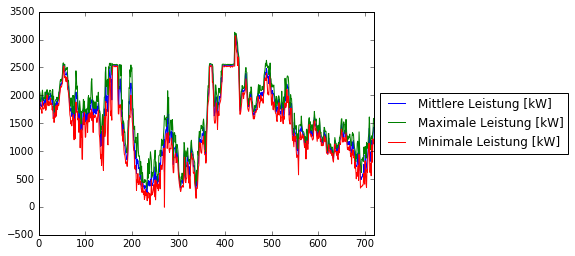

In [205]:
log_df[[u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',
u'Minimale Leistung [kW]']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

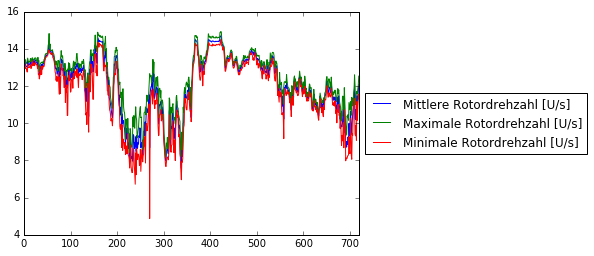

In [206]:
log_df[[u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

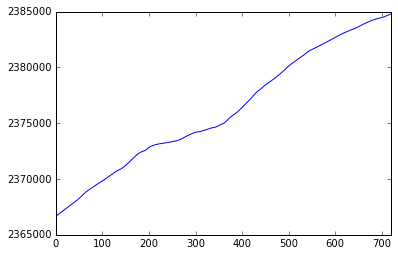

In [207]:
log_df[u'Produzierte Energie [kWh]'].plot();

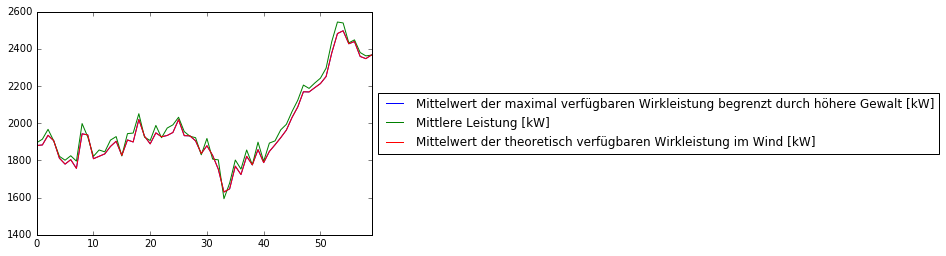

In [208]:
log_df[0:60][[u'Mittelwert der maximal verfügbaren Wirkleistung begrenzt durch höhere Gewalt [kW]',u'Mittlere Leistung [kW]',u'Mittelwert der theoretisch verfügbaren Wirkleistung im Wind [kW]']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

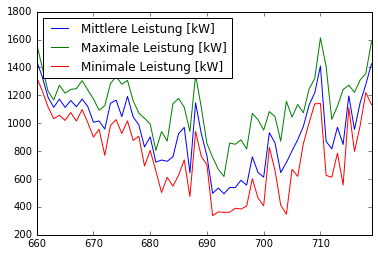

In [209]:
log_df[-60:][[u'Mittlere Leistung [kW]',
u'Maximale Leistung [kW]',
u'Minimale Leistung [kW]']].plot();

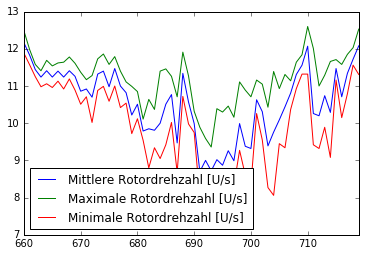

In [210]:
log_df[-60:][[u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]']].plot();

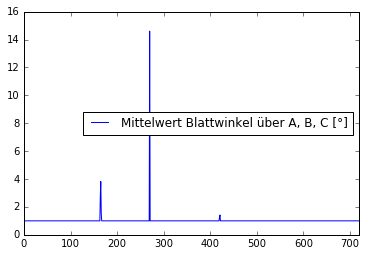

In [226]:
log_df[[u'Mittelwert Blattwinkel über A, B, C [°]']].plot();

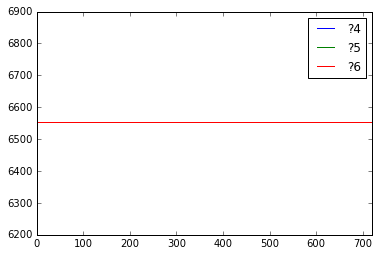

In [212]:
log_df[[u'?4',u'?5',u'?6']].plot();

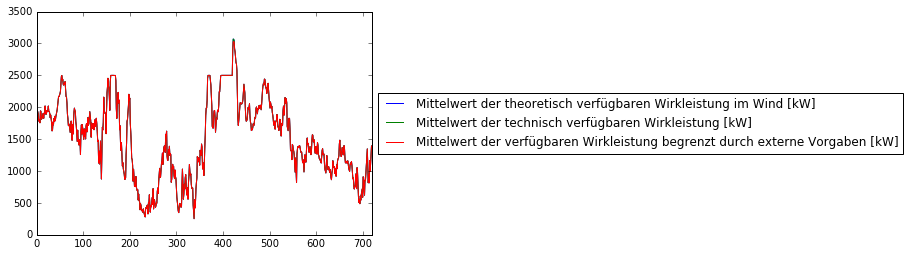

In [215]:
log_df[[u'Mittelwert der theoretisch verfügbaren Wirkleistung im Wind [kW]',u'Mittelwert der technisch verfügbaren Wirkleistung [kW]',u'Mittelwert der verfügbaren Wirkleistung begrenzt durch externe Vorgaben [kW]']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));


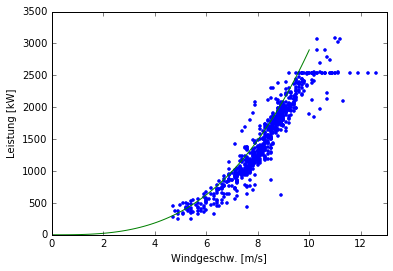

In [216]:
plt.plot(log_df[[u'Mittlere Windgeschw. [m/s]']],log_df[[u'Mittlere Leistung [kW]']],'.')
x1,x2,y1,y2 = plt.axis()
v=np.linspace(0,10,100)
power=2.9*v**3
plt.plot(v,power)
plt.axis((0,x2,0,y2));
plt.xlabel("Windgeschw. [m/s]")
plt.ylabel("Leistung [kW]");

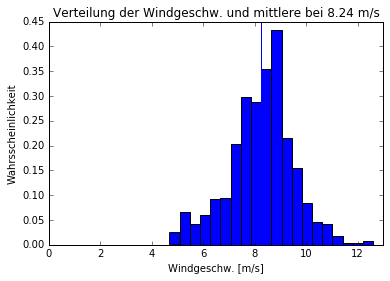

In [217]:
plt.hist(log_df[[u'Mittlere Windgeschw. [m/s]']].values,normed=True,bins=20);
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,0,y2));
mean=log_df[[u'Mittlere Windgeschw. [m/s]']].mean().values[0]
plt.axvline(mean);
plt.title('Verteilung der Windgeschw. und mittlere bei ' +"%.2f"% mean +" m/s")
plt.xlabel("Windgeschw. [m/s]")
plt.ylabel("Wahrsscheinlichkeit"); #ToDo Weibull-Verteilung;

In [218]:
log_df[[u'Mittlere Windgeschw. [m/s]']].mean().values

array([ 8.23750012])

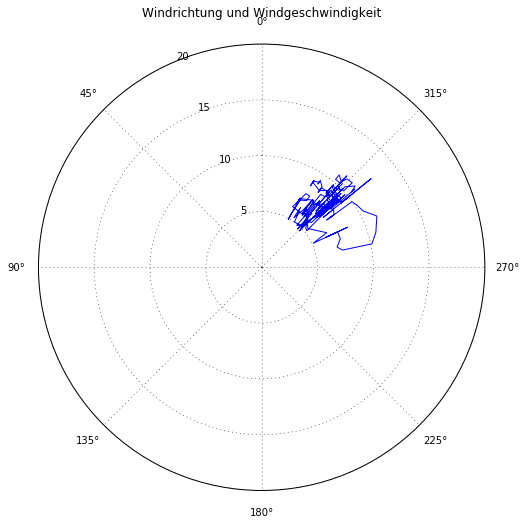

In [219]:
fig=plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

ax.plot(np.pi+log_df[[u'Gondelposition [º]']].values*np.pi/180,log_df[[u'Mittlere Windgeschw. [m/s]']].values)
ax.set_theta_zero_location("N")
ax.set_rmax(20)
ax.grid(True)
plt.title('Windrichtung und Windgeschwindigkeit');

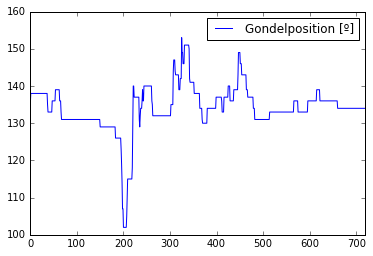

In [220]:
(log_df[[u'Gondelposition [º]']]%360).plot();

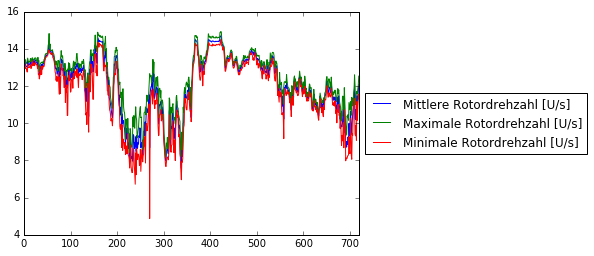

In [221]:
log_df[[u'Mittlere Rotordrehzahl [U/s]',
u'Maximale Rotordrehzahl [U/s]',
u'Minimale Rotordrehzahl [U/s]']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

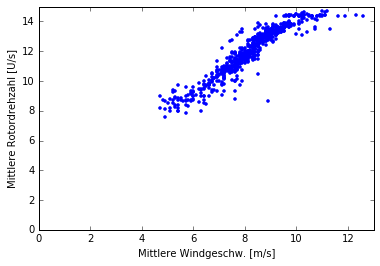

In [222]:
plt.plot(log_df[[u'Mittlere Windgeschw. [m/s]']].values  ,log_df[[u'Mittlere Rotordrehzahl [U/s]']].values,'.')
plt.xlabel(u'Mittlere Windgeschw. [m/s]')
plt.ylabel(u'Mittlere Rotordrehzahl [U/s]')
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,0,y2));

In [223]:
path2='Loc/Wec/Plant2/Log/Wecstd'
dd=xda.Browse(ItemName=path2)
dd

([ItemContainer(Name=RawSmpTime, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName=Loc/Wec/Plant2/Log/Wecstd/RawSmpTime),
  ItemContainer(Name=Raw, HasChildren=True, ItemPath=, IsEmpty=False, _Properties={}, IsItem=False, ItemName=Loc/Wec/Plant2/Log/Wecstd/Raw),
  ItemContainer(Name=RepSmpTime, HasChildren=False, ItemPath=, IsEmpty=False, _Properties={}, IsItem=True, ItemName=Loc/Wec/Plant2/Log/Wecstd/RepSmpTime),
  ItemContainer(Name=Rep, HasChildren=True, ItemPath=, IsEmpty=False, _Properties={}, IsItem=False, ItemName=Loc/Wec/Plant2/Log/Wecstd/Rep),
  ItemContainer(Name=Day, HasChildren=True, ItemPath=, IsEmpty=False, _Properties={}, IsItem=False, ItemName=Loc/Wec/Plant2/Log/Wecstd/Day),
  ItemContainer(Name=Week, HasChildren=True, ItemPath=, IsEmpty=False, _Properties={}, IsItem=False, ItemName=Loc/Wec/Plant2/Log/Wecstd/Week),
  ItemContainer(Name=Month, HasChildren=True, ItemPath=, IsEmpty=False, _Properties={}, IsItem=False, ItemName=Loc/Wec/Plant

In [228]:
xda.GetProperties([ItemContainer(ItemName='Loc/LocName')])

OPCServerError: E_FAIL


In [227]:
xda.Read([ItemContainer(ItemName='Loc/LocName')])

([ItemContainer(QualityField=good, VendorField=0, Value=Wuelknitz-Streumen, ItemPath=, IsEmpty=False, _Properties={}, ClientItemHandle=ZSI_750c4svJWm_ReadItem_0, ItemName=Loc/LocName, LimitField=none)],
 {'ClientRequestHandle': 'ZSI_750c4svJWm_Read',
  'RcvTime': datetime.datetime(2016, 2, 7, 12, 12, 1),
  'ReplyTime': datetime.datetime(2016, 2, 7, 12, 12, 1),
  'RevisedLocaleID': 'en-us',
  'ServerState': 'running'})

In [ ]:
xda.